# Prosper Loan Data Exploration - By Dania Adimi
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In the next few slides, we will be communicating some fundings!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')

## Wrangling

In [3]:
cols =  [
    'Term', 'LoanStatus', 'Occupation', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors', 'PercentFunded', 'MonthlyLoanPayment'
]
df = df[cols]
df = df.dropna(subset=['ProsperRating (Alpha)']).reset_index()
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])
df['TotalProsperLoans'] = df['TotalProsperLoans'].fillna(0)

In [4]:
def change_to_default(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    elif row['LoanStatus'] == 'Past Due (1-15 days)':
        return 'Past Due'
    elif row['LoanStatus'] == 'Past Due (31-60 days)':
        return 'Past Due'
    elif row['LoanStatus'] == 'Past Due (61-90 days)':
        return 'Past Due'
    elif row['LoanStatus'] == 'Past Due (91-120 days)':
        return 'Past Due'
    elif row['LoanStatus'] == 'Past Due (16-30 days)':
        return 'Past Due'
    elif row['LoanStatus'] == 'Past Due (>120 days)':
        return 'Past Due'
    else:
        return row['LoanStatus']
    
df['LoanStatus (Modified)'] = df.apply(change_to_default, axis=1)
df['LoanStatus (Modified)'].value_counts()

Current                   56576
Completed                 19664
Defaulted                  6341
Past Due                   2067
FinalPaymentInProgress      205
Name: LoanStatus (Modified), dtype: int64

In [5]:
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def listing_categorie(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]
    
df['ListingCategory (category)'] = df.apply(listing_categorie, axis=1)
df['ListingCategory (category)'].value_counts()

Debt Consolidation    53180
Other                 17337
Home Improvement       6801
Business               5298
Auto                   2237
Name: ListingCategory (category), dtype: int64

In [6]:
base_color = sns.color_palette()[3]

## Borrower's Rate

**Insights**
* We can clearly see that rates are from 0.05 to 0.35 at most.
* The distribution of the BorrowerRate is quite strange, but we can say that most borrowers have a rate of approximatively 0.32.

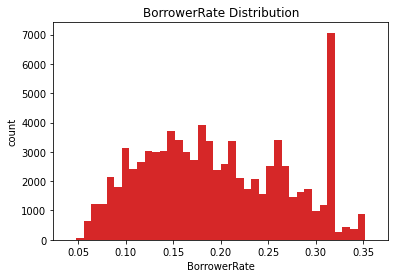

In [7]:
plt.hist(data=df, x="BorrowerRate", bins=40, color=base_color);
plt.title('BorrowerRate Distribution');
plt.xlabel('BorrowerRate');
plt.ylabel('count');

##  Loan status
**Insights**
* We can clearly see that most Loan status are `Current`.
* We have several Past due loans depending on the length of payment delay. E.g Past Due (16-30 days).

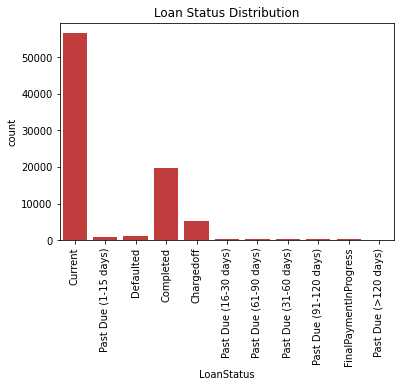

In [8]:
plt.xticks(rotation=90)
fig = sns.countplot(data = df, x = 'LoanStatus', color = base_color);
plt.title('Loan Status Distribution');

## Loan Amount vs Loan Date
**Insights**
* We can say that as the loan date increases, the Loan Amount increases. However we do have some noise here and there.

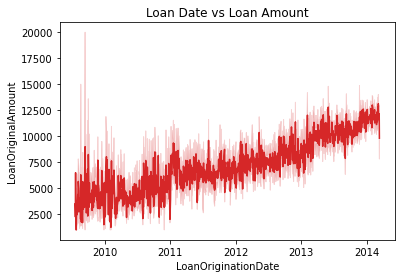

In [9]:
sns.lineplot(data = df, x="LoanOriginationDate", y='LoanOriginalAmount', color = base_color)
plt.title('Loan Date vs Loan Amount');

## BorrowerRate vs Loan Amount
**Insights**
* From the scatter plot below, we can see that when the LoanOriginalAmount increases, the BorrowerRate decreases.

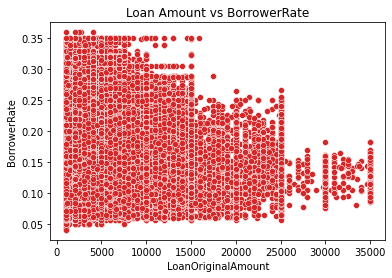

In [10]:
sns.scatterplot(data = df, x="LoanOriginalAmount", y="BorrowerRate", color=  base_color);
plt.title('Loan Amount vs BorrowerRate');

## Relationships between EmploymentStatus, BorrowerRate and Recommendations
**Insights**
* We can clearly see that `Not Employed`, `Retired` and `Part-time` tend to have from zero to one recommendation, and tend to have a decent borrowerRate.
* We can clearly see that borrowers with `Full-time` positions tend to have more recommendations, maybe due to networking (after them we do have `Employed`, and `Self-employed`), and they tend to have a decent borrowerRate as well.
* We can see an Employed borrower who got 19 recommendations has a low borrow rate.

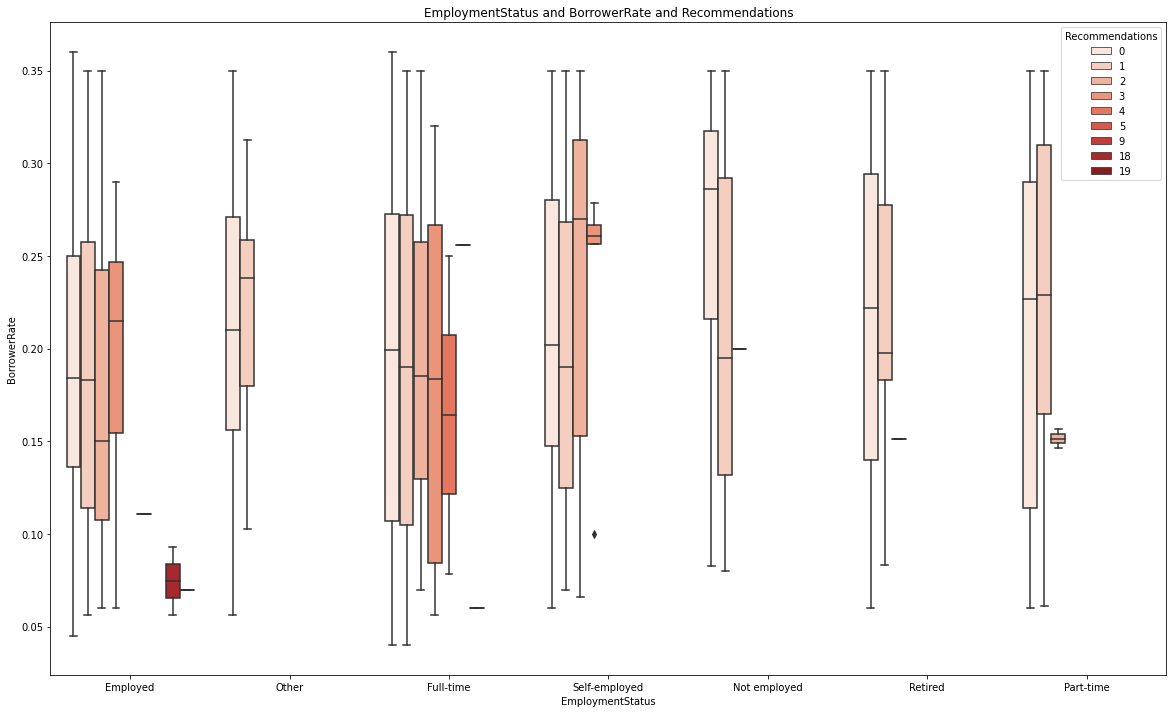

In [11]:
plt.figure(figsize=[20,12])
sns.boxplot(x = 'EmploymentStatus', y="BorrowerRate", hue = 'Recommendations',
              data = df, palette = 'Reds');
plt.title('EmploymentStatus and BorrowerRate and Recommendations');

In [12]:
!jupyter nbconvert [notebook.ipynb] --to slides --post serve --no-input --no-prompt

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern '[notebook.ipynb]' matched no files


    Name of the template file to use
    Default: None
    Equivalent to: [--TemplateExporter.template_file]
--writer=<DottedObjectName>
    Writer class used to write the 
                                        results of the conversion
    Default: 'FilesWriter'
    Equivalent to: [--NbConvertApp.writer_class]
--post=<DottedOrNone>
    PostProcessor class used to write the
                                        results of the conversion
    Default: ''
    Equivalent to: [--NbConvertApp.postprocessor_class]
--output=<Unicode>
    overwrite base name use for output files.
                can only be used when converting one notebook at a time.
    Default: ''
    Equivalent to: [--NbConvertApp.output_base]
--output-dir=<Unicode>
    Directory to write output(s) to. Defaults
                                  to output to the directory of each notebook. To recover
                                  previous default behaviour (outputting to the current 
                                 